##Task 1


#Exploratory Data Analysis (EDA)


#Load and Inspect the Data

In [ ]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
Products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [ ]:
print(customers.info())
print(customers.isnull().sum())
print(customers.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
0


#Perform EDA


Top-selling products or categories:

In [ ]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_products)


ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


Customer behavior by region:

In [ ]:
regional_sales = customers.merge(transactions, on='CustomerID').groupby('Region')['TotalValue'].sum()
print(regional_sales)


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


Monthly sales trends:

<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='TransactionDate'>

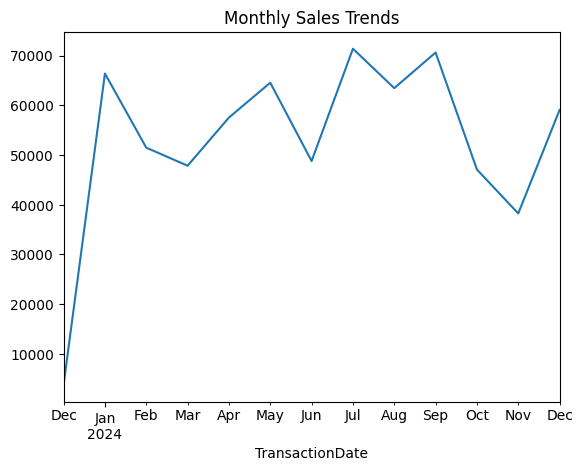

In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trends')


#Visualize Key Findings

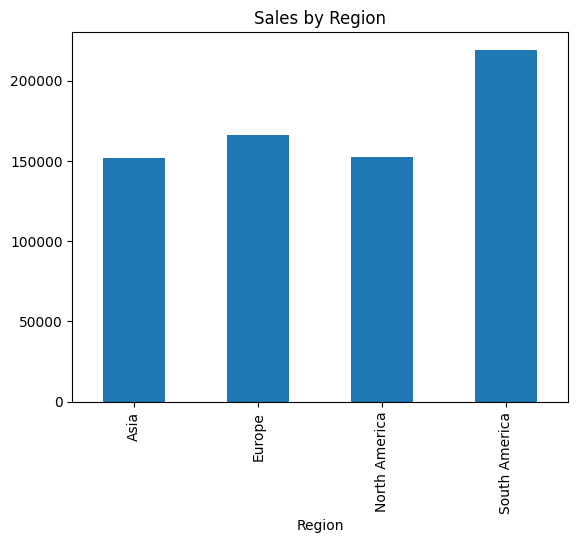

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

region_sales = customers.merge(transactions, on='CustomerID').groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.show()
